In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import time, shutil, os
import scipy
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import pylab as plt

In [81]:
def plot_results_vae(exp_name, n, title = "", error_bars = False):
    orig_dist = []
    orig_dist_std = []
    adv_dist = []
    adv_dist_std = []
    noise_dist = []
    recon_dist = []
    orig_target_dist = []
    target_recon_dist = []
    target_recon_dist_std = []
    orig_target_recon_dist = []
    orig_target_recon_dist_std = []
    C = []

    for i in range(n):
            df = pd.read_csv("results/" + exp_name + "/exp_" + str(i) + ".csv")
            orig_dist.append(df['orig_dist'].values)
            orig_dist_std.append(df['orig_dist_std'].values)
            adv_dist.append(df['adv_dist'].values)
            adv_dist_std.append(df['adv_dist_std'].values)
            noise_dist.append(df['noise_dist'].values)
            recon_dist.append(df['recon_dist'].values)
            target_recon_dist.append(df['target_recon_dist'].values)
            target_recon_dist_std.append(df['target_recon_dist'].values)
            orig_target_dist.append(df['orig_target_dist'].values)
            orig_target_recon_dist.append(df['orig_target_recon_dist'].values)
            orig_target_recon_dist_std.append(df['orig_target_recon_dist_std'].values)
            C.append(df['C'].values)
            
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n):
        xs = noise_dist[i]/orig_target_dist[i]
        zs = (adv_dist[i] - target_recon_dist[i])/(orig_target_recon_dist[i] - target_recon_dist[i])
        zsds = np.sqrt(adv_dist_std[i]**2.0 + target_recon_dist_std[i]**2.0)/np.sqrt(orig_target_recon_dist_std[i]**2.0 + target_recon_dist_std[i]**2.)
        (xs, zs, zsds) = zip(*[(x,z,zd) for (x,z,zd) in zip(xs, zs, zsds) if x >=0 and x <= 1])
        npoints = len(xs)
        ax.plot(xs, [i]*npoints, zs, color = 'r', alpha = 0.5)
        
        if error_bars:
            for j in range(len(xs)):
                x = np.array([xs[j], xs[j]])
                y = np.array([i, i])
                z = np.array([zs[j], zs[j]])
                zerror = np.array([-zsds[j], zsds[j]])
                ax.plot(x, y, z + zerror, marker="_",color = 'r', alpha = 0.25)

    ax.set_xlabel('Distortion')
    ax.set_xlim3d(0, 1)
    ax.set_ylabel('Experiment')
    ax.set_zlabel('Adversarial rec. - Target')
    ax.set_zlim3d(0, 1)
    fig.set_figwidth(8)
    fig.set_figheight(6)
    plt.title(title)
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(n):
        ys = noise_dist[i]/orig_target_dist[i]
        zs = recon_dist[i]/orig_target_recon_dist[i]
        (ys, zs) = zip(*[(y,z) for (y,z) in zip(ys, zs) if y >=0 and y <= 1])
        npoints = len(ys)
        ax.plot([i]*npoints, ys, zs, color = 'r', alpha = 0.5)
        
    ax.set_ylabel('Distortion')
    ax.set_ylim3d(0, 1)
    ax.set_xlabel('Experiment')
    ax.set_zlabel('Adversarial rec. - Adversarial input')
    ax.set_zlim3d(0, 1)
    fig.set_figwidth(9)
    fig.set_figheight(6)
    plt.title(title)

    plt.show()

In [82]:
def plot_results_ae(exp_name, n, title = ""):
    orig_dist = []
    adv_dist = []
    noise_dist = []
    recon_dist = []
    orig_target_dist = []
    target_recon_dist = []
    orig_target_recon_dist = []
    C = []

    for i in range(n):
            df = pd.read_csv("results/" + exp_name + "/exp_" + str(i) + ".csv")
            orig_dist.append(df['orig_dist'].values)
            adv_dist.append(df['adv_dist'].values)
            noise_dist.append(df['noise_dist'].values)
            recon_dist.append(df['recon_dist'].values)
            target_recon_dist.append(df['target_recon_dist'].values)
            orig_target_dist.append(df['orig_target_dist'].values)
            orig_target_recon_dist.append(df['orig_target_recon_dist'].values)
            C.append(df['C'].values)
            
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n):
        xs = noise_dist[i]/orig_target_dist[i]
        zs = (adv_dist[i] - target_recon_dist[i])/(orig_target_recon_dist[i] - target_recon_dist[i])
        (xs, zs) = zip(*[(x,z) for (x,z) in zip(xs, zs) if x >=0 and x <= 1])
        npoints = len(xs)
        ax.plot(xs, [i]*npoints, zs, color = 'r', alpha = 0.5)

    ax.set_xlabel('Distortion')
    ax.set_xlim3d(0, 1)
    ax.set_ylabel('Experiment')
    ax.set_zlabel('Adversarial rec. - Target')
    ax.set_zlim3d(0, 1)
    fig.set_figwidth(8)
    fig.set_figheight(6)
    plt.title(title)
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(n):
        ys = noise_dist[i]/orig_target_dist[i]
        zs = recon_dist[i]/orig_target_recon_dist[i]
        (ys, zs) = zip(*[(y,z) for (y,z) in zip(ys, zs) if y >=0 and y <= 1])
        npoints = len(ys)
        ax.plot([i]*npoints, ys, zs, color = 'r', alpha = 0.5)

    ax.set_ylabel('Distortion')
    ax.set_ylim3d(0, 1)
    ax.set_xlabel('Experiment')
    ax.set_zlabel('Adversarial rec. - Adversarial input')
    ax.set_zlim3d(0, 1)
    fig.set_figwidth(9)
    fig.set_figheight(6)
    plt.title(title)

    plt.show()

In [45]:
def plot_results_no_target(exp_name, n, title = "", error_bars = False):
    orig_dist = []
    orig_dist_std = []
    noise_dist = []
    recon_dist = []
    C = []

    for i in range(n):
            df = pd.read_csv("results/" + exp_name + "/exp_" + str(i) + ".csv")
            orig_dist.append(df['orig_dist'].values)
            orig_dist_std.append(df['orig_dist_std'].values)
            noise_dist.append(df['noise_dist'].values)
            recon_dist.append(df['recon_dist'].values)
            C.append(df['C'].values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    npoints = len(orig_dist[0])
    
    for i in range(n):
        ax.plot([i]*npoints, noise_dist[i], recon_dist[i], color = 'r', alpha = 0.5)

    ax.set_ylabel('Distortion')
    ax.set_xlabel('Experiment')
    ax.set_zlabel('Adversarial rec. - Adversarial input')
    fig.set_figwidth(9)
    fig.set_figheight(6)
    plt.title(title)

    plt.show()

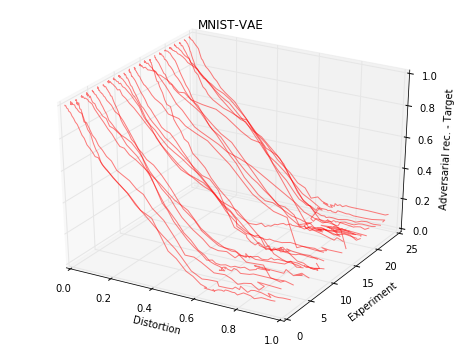

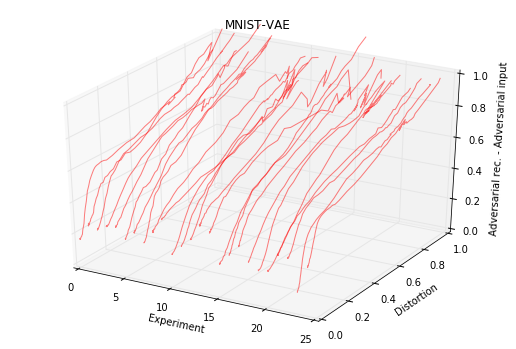

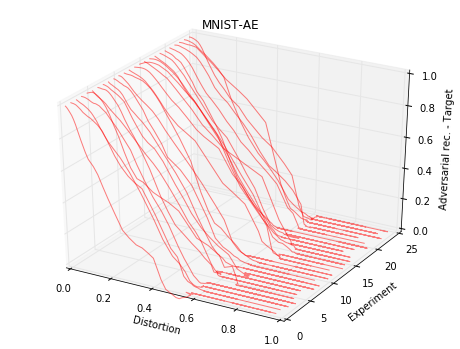

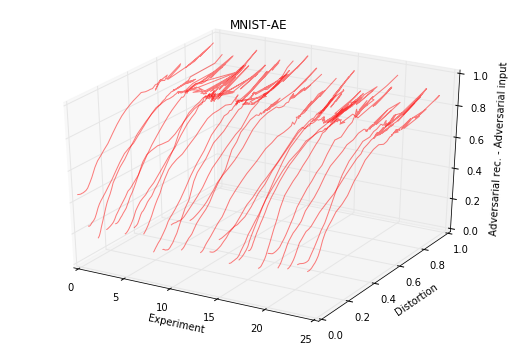

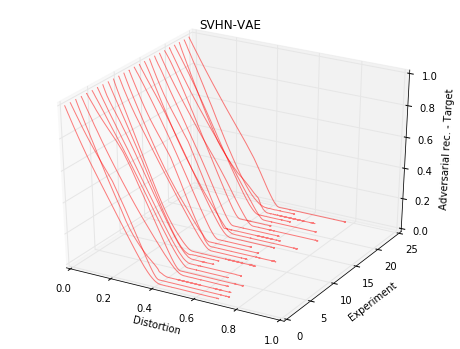

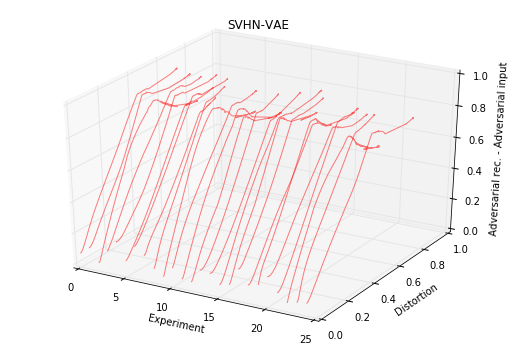

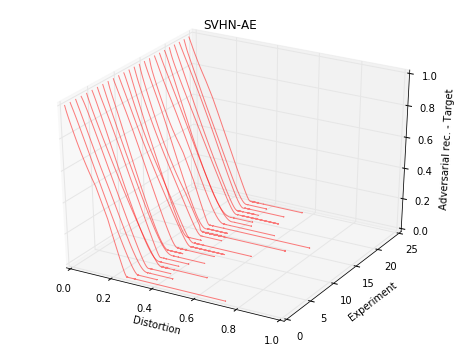

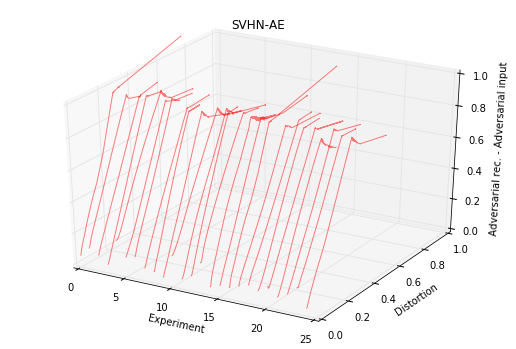

In [83]:
plot_results_vae("mnist_vae", 25, "MNIST-VAE")
plot_results_ae("mnist_ae", 25, "MNIST-AE")
plot_results_vae("svhn_conv_vae", 25, "SVHN-VAE")
plot_results_ae("svhn_conv_ae", 25, "SVHN-AE")